In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
from hw1 import tools as hw1_tools
import tools as hw2_tools

import numpy as np
import matplotlib.pyplot as plt

# 1.

In [59]:
N = 50
x = np.linspace(0,1,N)#np.random.random(N)
y = x**2 + 0.1*np.random.randn(N)
X = np.c_[np.ones_like(x), x, x**2]

lmbd = np.logspace(-1, 5, 7)
yhat, beta = hw1_tools.get_yhat(X,y)
yhat_ridge, beta_ridge = hw2_tools.ridge_regression(X,y, lmbd = lmbd)

Lambda     r2
10^-1:    0.93
10^0 :    0.91
10^1 :    0.69
10^2 :   -0.09
10^3 :   -0.97
10^4 :   -1.16
10^5 :   -1.18


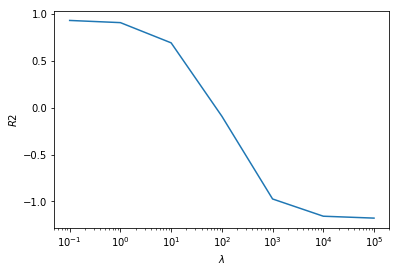

In [60]:
hw2_tools.R2_analysis(y, yhat_ridge, lmbd, log_lambda = True)

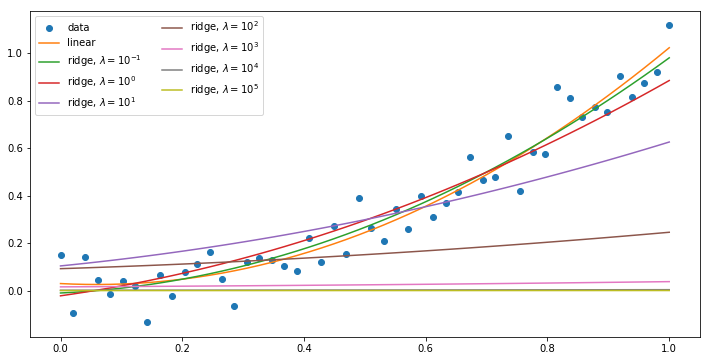

In [62]:
hw2_tools.plot(x,y,yhat,yhat_ridge,lmbd)

# 2.

In [63]:
from sklearn.linear_model import Ridge 

In [80]:
ridge_regr = Ridge(alpha = 0, fit_intercept = False)
yhat_ridge = []
beta_ridge = []

for l in lmbd:
    ridge_regr.set_params(alpha = l)
    a = ridge_regr.fit(X,y)
    yhat_ridge.append(a.predict(X))
    coeffs = a.coef_
    coeffs[0] = a.intercept_
    beta_ridge.append(coeffs)

Lambda     r2
10^-1:    0.93
10^0 :    0.91
10^1 :    0.69
10^2 :   -0.09
10^3 :   -0.97
10^4 :   -1.16
10^5 :   -1.18


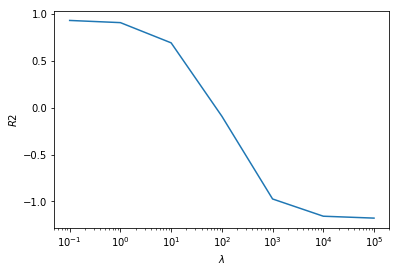

In [81]:
hw2_tools.R2_analysis(y,yhat_ridge,lmbd)

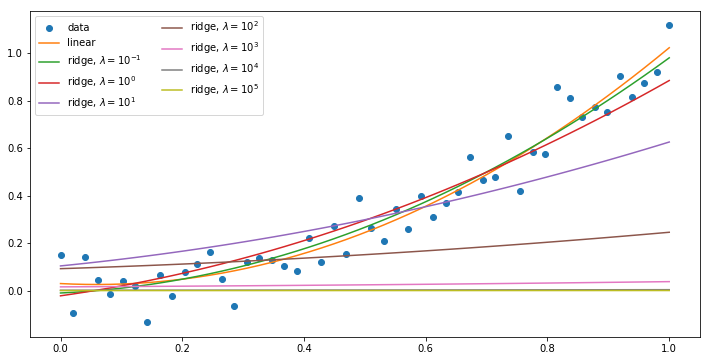

In [82]:
hw2_tools.plot(x,y,yhat,yhat_ridge,lmbd)

# Copy pasta

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
np.random.seed(4155)
n_samples = 100
x = np.random.rand(n_samples,1)
y = 5*x*x + 0.1*np.random.rand(n_samples,1)
# Centering  x and y.
x_ = x - np.mean(x)
y_ = y - np.mean(y)
# beta_0 = mean(y)
X = np.c_[np.ones((n_samples,1)), x, x**2]
X_ = np.c_[x_, x_**2]
### 1.
lmb_values = [1e-4, 1e-3, 1e-2, 10, 1e2, 1e4]
num_values = len(lmb_values)
## Ridge-regression of centered and not centered data
beta_ridge = np.zeros((3,num_values))
beta_ridge_centered = np.zeros((3,num_values))
I3 = np.eye(3)
I2 = np.eye(2)
for i,lmb in enumerate(lmb_values):
    beta_ridge[:,i] = (np.linalg.inv( X.T @ X + lmb*I3) @ X.T @ y).flatten() 
    beta_ridge_centered[1:,i] = (np.linalg.inv( X_.T @ X_ + lmb*I2) @ X_.T @ y_).flatten()
# sett beta_0 = np.mean(y)
beta_ridge_centered[0,:] = np.mean(y)
## OLS (ordinary least squares) solution
beta_ls = np.linalg.inv( X.T @ X ) @ X.T @ y
## Evaluate the models
pred_ls = X @ beta_ls
pred_ridge =  X @ beta_ridge
pred_ridge_centered =  X_ @ beta_ridge_centered[1:] + beta_ridge_centered[0,:]
## Plot the results
# Sorting
sort_ind = np.argsort(x[:,0])
x_plot = x[sort_ind,0]
x_centered_plot = x_[sort_ind,0]
pred_ls_plot = pred_ls[sort_ind,0]
pred_ridge_plot = pred_ridge[sort_ind,:]
pred_ridge_centered_plot = pred_ridge_centered[sort_ind,:]
# Plott not centered
plt.plot(x_plot,pred_ls_plot,label=’ls’)
for i in range(num_values):
    plt.plot(x_plot,pred_ridge_plot[:,i],label=’ridge, lmb= %g ’%lmb_values[i])
plt.plot(x,y,’ro’)
plt.title(’linear regression on un-centered data’)
plt.legend()
# Plott centered
plt.figure()
for i in range(num_values):
    plt.plot(x_centered_plot,pred_ridge_centered_plot[:,i],label=’ridge, lmb= %g ’%lmb_values[i])
plt.plot(x_,y,’ro’)
plt.title(’linear regression on centered data’)
plt.legend()
# 2.
pred_ridge_scikit =  np.zeros((n_samples,num_values))
for i,lmb in enumerate(lmb_values):
    pred_ridge_scikit[:,i] = (Ridge(alpha=lmb,fit_intercept=False).fit(X,y).predict(X)).flatten()
    
# fit_intercept=False fordi bias er allerede i X
plt.figure()
plt.plot(x_plot,pred_ls_plot,label=’ls’)

for i in range(num_values):
    plt.plot(x_plot,pred_ridge_scikit[sort_ind,i],label=’scikit-ridge, lmb= %g ’%lmb_values[i])
    
plt.plot(x,y,’ro’)
plt.legend()
plt.title(’linear regression using scikit’)
plt.show()
### R2-score of the results
for i in range(num_values):
    print (’lambda = %g ’%lmb_values[i])
    print (’r2 for scikit: %g ’%r2_score(y,pred_ridge_scikit[:,i]))
    print (’r2 for own code, not centered: %g ’%r2_score(y,pred_ridge[:,i]))
    print (’r2 for own, centered: %g\n ’%r2_score(y,pred_ridge_centered[:,i]))

SyntaxError: invalid character in identifier (<ipython-input-83-cecb00267ce4>, line 43)